In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
sns.set_style('darkgrid')

In [4]:
rank = pd.read_csv("../data/curated/top100.csv")
value_count = rank['segment'].value_counts()
value_count

personal & household good retail    43
recreational good retailing         30
technical & machinery service       20
health service                       7
Name: segment, dtype: int64

In [5]:
rank['tags'].value_counts()

tent             14
computer         12
watch             9
gift              8
digital goods     7
motor             5
books             5
furniture         5
florists          5
opticians         5
artist supply     5
garden supply     4
cable             3
stationery        3
shoe              3
music             2
health            2
antique           2
hobby             1
Name: tags, dtype: int64

In [6]:
tag_lst = []
for segments in rank['segment'].unique():
    sub_lst = []
    for tags in rank.loc[rank['segment'] == segments]['tags'].unique():
        tag_lst.append(len(rank.loc[rank['tags'] == tags]))
        sub_lst.append(tags)
    print(segments, ": ", sub_lst)
tag_lst

personal & household good retail :  ['watch', 'gift', 'music', 'florists', 'artist supply', 'furniture', 'antique', 'garden supply', 'shoe']
recreational good retailing :  ['tent', 'digital goods', 'hobby', 'books', 'stationery']
technical & machinery service :  ['cable', 'computer', 'motor']
health service :  ['opticians', 'health']


[9, 8, 2, 5, 5, 5, 2, 4, 3, 14, 7, 1, 5, 3, 3, 12, 5, 5, 2]

In [7]:
cmap1 = plt.colormaps['Blues']
inner_colors1 = cmap1(np.arange(9)*30 + 100)
cmap2 = plt.colormaps['Oranges']
inner_colors2 = cmap2(np.arange(5)*30 + 100)
cmap3 = plt.colormaps['Greens']
inner_colors3 = cmap3(np.arange(3)*30 + 100)
cmap4 = plt.colormaps['Purples']
inner_colors4 = cmap4(np.arange(2)*30 + 100)

inner_colors = np.vstack((inner_colors1, inner_colors2, inner_colors3, inner_colors4))

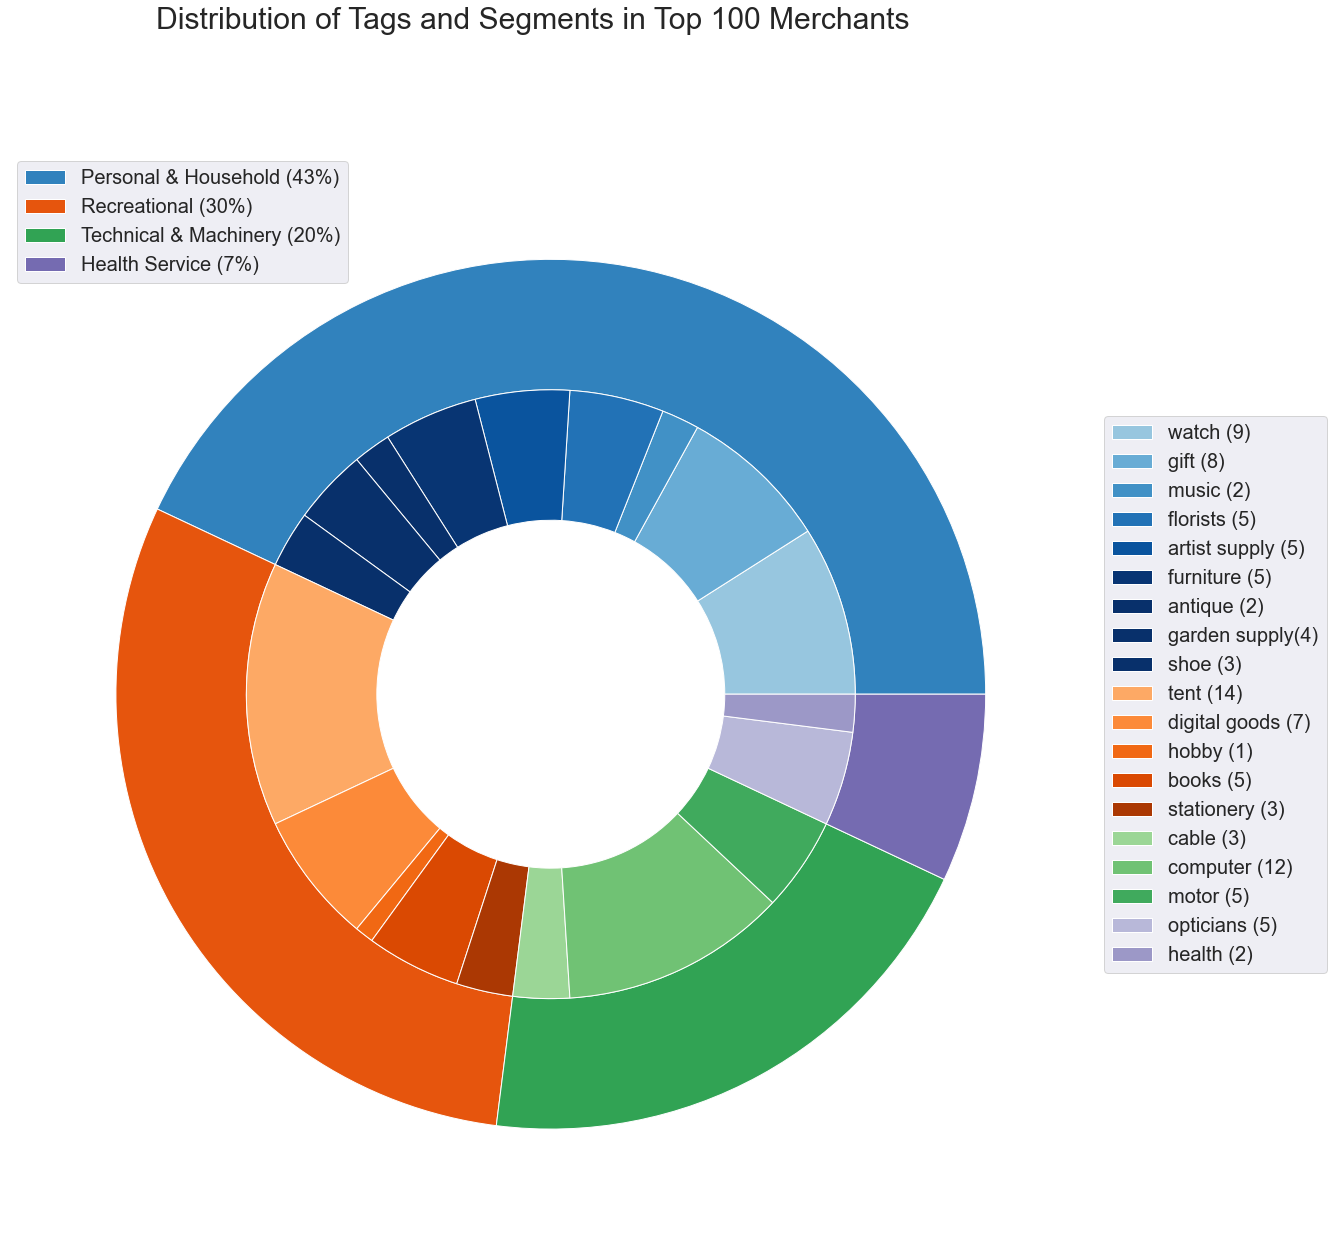

In [8]:
fig, ax = plt.subplots(figsize = (20, 20))
size = 0.3

[9, 8, 2, 5, 5, 5, 2, 4, 3, 14, 7, 1, 5, 3, 3, 12, 5, 5, 2]
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(4)*4)

labels1 = [r'Personal & Household (43%)', r'Recreational (30%)', r'Technical & Machinery (20%)', r'Health Service (7%)']
size1 = [43, 30, 20, 7]
patches1, texts1= ax.pie(size1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
legend1 = plt.legend(patches1, labels1, loc = 'upper left', prop={'size': 20})

labels2 = [r'watch (9)', r'gift (8)', r'music (2)', r'florists (5)', r'artist supply (5)', r'furniture (5)', 
        r'antique (2)', r'garden supply(4)', r'shoe (3)', r'tent (14)', r'digital goods (7)', r'hobby (1)',\
        r'books (5)', r'stationery (3)', r'cable (3)', r'computer (12)', r'motor (5)', r'opticians (5)', r'health (2)']
size2 = tag_lst
patches2, texts2= ax.pie(size2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
plt.legend(patches2, labels2, loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})
plt.gca().add_artist(legend1)

ax.set(aspect="equal")
fig.suptitle('Distribution of Tags and Segments in Top 100 Merchants', fontsize=30)
plt.savefig("../plots/Tag and Segments Distribution in TOP100.png", bbox_inches = 'tight')
plt.show()

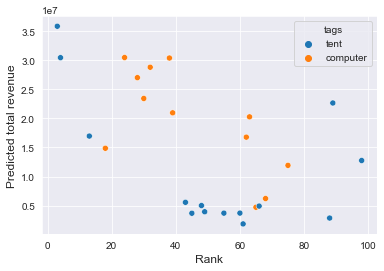

In [10]:
top_two = rank.loc[(rank['tags'] == 'tent') | (rank['tags'] == 'computer')]

sns.scatterplot(y=top_two['pred_total_revenue'], x=top_two['rank'], hue=top_two['tags'])
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Predicted total revenue", fontsize=12)
plt.show()

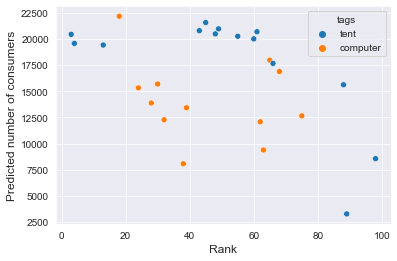

In [11]:
sns.scatterplot(x = 'rank', y = 'pred_total_num_consumer', data = top_two, hue = 'tags')
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Predicted number of consumers", fontsize=12)
plt.show()

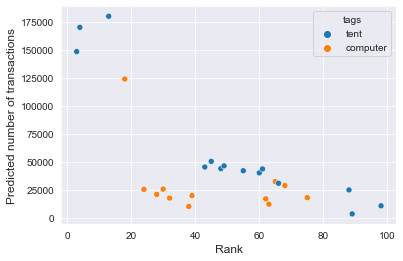

In [12]:
sns.scatterplot(x = 'rank', y = 'pred_total_num_transaction', data = top_two, hue = 'tags')
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Predicted number of transactions", fontsize=12)
plt.show()

In [13]:
mean_total_num_consumer = []
mean_total_num_transaction = []
mean_total_revenue = []
tags = []
for tag in rank['tags'].unique():
    tags.append(tag)
    sub = rank.loc[rank['tags'] == tag]
    mean_total_num_consumer.append(sub['pred_total_num_consumer'].mean())
    mean_total_num_transaction.append(sub['pred_total_num_transaction'].mean())
    mean_total_revenue.append(sub['pred_total_revenue'].mean())


In [14]:
full = pd.read_csv("../data/curated/ranking.csv")

In [15]:
full_count = full[['segment', 'merchant_abn']].groupby("segment").count()
full_count.rename({'merchant_abn': 'full_merchant_count'}, axis=1, inplace=True)
rank_count = rank[['segment', 'merchant_abn']].groupby("segment").count()
rank_count.rename({'merchant_abn': '100_merchant_count'}, axis=1, inplace=True)

In [17]:
rank_proportion = rank_count.merge(full_count, on='segment', how='left')
rank_proportion['proportion'] = rank_proportion['100_merchant_count'] / rank_proportion['full_merchant_count']
rank_proportion

,100_merchant_count,full_merchant_count,proportion
segment,,,
health service,7,315,0.022222
personal & household good retail,43,1744,0.024656
recreational good retailing,30,1010,0.029703
technical & machinery service,20,957,0.020899


In [19]:
full_filtered = full.loc[(full['pred_total_num_transaction'] > 0) & (full['pred_total_num_consumer'] > 0)]

In [21]:
average_compare = full_filtered[['tags', 'pred_total_num_consumer', 'pred_total_num_transaction', 'pred_total_revenue']].groupby('tags').mean()

In [22]:
average_compare_top = rank[['tags', 'pred_total_num_consumer', 'pred_total_num_transaction', 'pred_total_revenue']].groupby('tags').mean()
average_compare_top.rename({'pred_total_num_consumer': 'pred_total_num_consumer_top', 'pred_total_num_transaction': 'pred_total_num_transaction_top', 'pred_total_revenue': 'pred_total_revenue_top'}, axis=1, inplace=True)

In [24]:
average_compare = average_compare.merge(average_compare_top, on='tags', how='left').dropna()

In [25]:
average_compare = full_filtered[['segment', 'pred_total_num_consumer', 'pred_total_num_transaction', 'pred_total_revenue']].groupby('segment').mean()
average_compare_top = rank[['segment', 'pred_total_num_consumer', 'pred_total_num_transaction', 'pred_total_revenue']].groupby('segment').mean()
average_compare_top.rename({'pred_total_num_consumer': 'pred_total_num_consumer_top', 'pred_total_num_transaction': 'pred_total_num_transaction_top', 'pred_total_revenue': 'pred_total_revenue_top'}, axis=1, inplace=True)
average_compare = average_compare.merge(average_compare_top, on='segment', how='left').dropna()

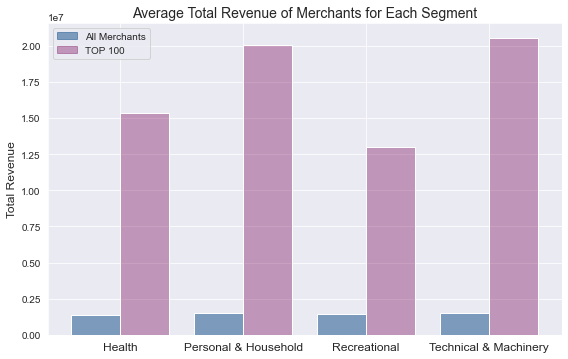

In [27]:
# set the figure size
plt.figure(figsize=(8, 5))

x_axis = np.arange(len(average_compare.index))
bar1 = plt.bar(x_axis -0.2, average_compare['pred_total_revenue'], width=0.4, label = 'All merchants', color=(0.2, 0.4, 0.6, 0.6))
bar2 = plt.bar(x_axis +0.2, average_compare['pred_total_revenue_top'], width=0.4, label = 'TOP 100', color = (0.5, 0.1, 0.4, 0.4))
plt.xticks(x_axis, ['Health', 'Personal & Household', 'Recreational', 'Technical & Machinery'], size = 12)
plt.ylabel("Total Revenue", size = 12)

# add legend
top_bar = mpatches.Patch(color=(0.2, 0.4, 0.6, 0.6), label='All Merchants')
bottom_bar = mpatches.Patch(color=(0.5, 0.1, 0.4, 0.4), label='TOP 100')
plt.legend(handles=[top_bar, bottom_bar])
plt.tight_layout()
plt.title('Average Total Revenue of Merchants for Each Segment', size = 14)
plt.savefig('../plots/Average Total Revenue of Merchants for Each Segment.png')
plt.show()